focal1 y focal 2:  99.91071428571489 100.35825199645072
si:  0.0659133
Mt:  20


Saving saturn.jpg to saturn.jpg


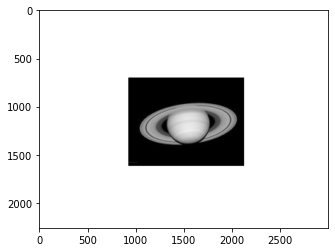

In [10]:

import numpy as np
import math 
from PIL import Image
from matplotlib import pyplot as plt
def ray_tracing(width, height, rayo, so1, n1, si1, sL, obj, pixels):
    
    #Potencia de la superficie
    
    D1 = (nl - 1)/R1# potencia de la lente 1
    D2 = (nl - 1)/(-R2)
    
    D3=(nl - 1)/R3 # potencia de la lente 2
    D4 = (nl - 1)/(-R4)
    
    #Matriz de la lente
    
    a1 = (1 - (D2*dl)/nl)
    a2 = -D1-D2+(D1*D2*dl/nl)
    a3 = dl/nl
    a4 = (1 - (D1*dl)/nl)
    A1 = np.array([[a1,a2],[a3,a4]])
    #matriz de la lente 1
    
    a5 = (1 - (D4*dl)/nl)
    a6 = -D3-D4+(D3*D4*dl/nl)
    a7 = dl/nl
    a8 = (1 - (D3*dl)/nl)
    A2 = np.array([[a5,a6],[a7,a8]])
    #matriz de la lente 2

    E1=np.array([[-1,0],[0,1]])
    E2=np.array([[-1,0],[0,1]])
    #Matriz de espejos
    
    #Propagaciones
    Prop1 = np.array([[1,0],[so1/n5,1]])#antes
    Prop2 = np.array([[1,0],[si1/n5,1]])#despues
    Prop3 = np.array([[1,0],[sL/n5,1]]) #entre
  
    #Creacion de los rayos.
    for i in range(width):
        for j in range(height):
            
            #Get pixel value
            pos_x = i
            pos_y = j
            pixel = obj.getpixel((pos_x, pos_y))
            x = pos_x - width/2
            y = pos_y - height/2
            
            #we must measure the distance from the particular pixel to the center of the object (in pixels)
            #each pixel equals 1 mm
            r = math.sqrt( x*x + y*y ) + 1 #Corrección de redondeo
        
            #Vector rayo de entrada (punto en el objeto)
            y_objeto = r*0.000001 #each pixel equals 0.1 mm
            if rayo == 0: #principal
                alpha_entrada = math.atan(y_objeto/so1) #Entra en dirección del centro de la lente
            elif rayo == 1: #paralelo
                alpha_entrada = 0 #Entra paralelo al eje del sistemna óptico
            V_entrada = np.array([n1*alpha_entrada,y_objeto]) 
        
            #Cálculo del vector del rayo de salida
            V_salida = Prop2.dot(E2.dot(A2.dot(Prop3.dot(A1.dot(Prop1.dot(E1.dot(Prop1.dot(V_entrada))))))))
        
            #Transversal magnification
            y_imagen = V_salida[1]
            if rayo == 0: #principal
                Mt = (1)*y_imagen/y_objeto #atan correction
            elif rayo == 1: #paralelo
                Mt = y_imagen/y_objeto                

            #Conversion from image coordinates to lens coordinates        
            x_prime = Mt*x
            y_prime = Mt*y
            
            pos_x_prime = int(x_prime + width_output/2)
            pos_y_prime = int(y_prime + height_output/2)
            
            if  pos_x_prime < 0 or pos_x_prime >= width_output:
                continue
                
            if  pos_y_prime < 0 or pos_y_prime >= height_output:
                continue
                     
            if rayo == 0: #principal   
                pixels[pos_x_prime, pos_y_prime] = (int(pixel), int(pixel), int(pixel))
            elif rayo == 1: #paralelo    
                new_gray = (int(pixel) + pixels[pos_x_prime, pos_y_prime][0])
                pix_fin = ( int(new_gray), int(new_gray), int(new_gray) )        
                pixels[pos_x_prime, pos_y_prime] = pix_fin
            for k in range(0,50): #Inicializo el recorrer en el eje x
              for m in range (0,50): #Inicializo el recorrer en el eje y
                if  pos_x_prime+k < 0 or pos_x_prime+k >= width_output or pos_y_prime+m < 0 or pos_y_prime+m >= height_output:
                  continue
                pixels[pos_x_prime+k,pos_y_prime+m ]=pixels[pos_x_prime, pos_y_prime]
           

    return pixels

#Parametros de las lentes.
R1 = -0.3
R2 = -0.29840
dl = 0.01
nl = 1.56
n1=1
R3 = 0.3
R4 = 0.30161

#calculamos la focal de la lente
f = R1*R2/((R2-R1)*(nl-1))#foco de la primer lente
f2= R3*R4/((R4-R3)*(nl-1))#foco de la segundo lente
print("focal1 y focal 2: ", f, f2)

#Propagaciones en el aire antes y despues de la lente
#Después
si1 = 0.0659133 #Distancia desde el vertice del lente 2 hasta el plano imagen

n5 = 1 #Indice de refracción del aire 
sL=0.1552482#Distancia desde el vertice del lente 1 hasta el vertice del lente 2

so1 = 0.0113 #Distancia desde el vertice del lente hasta el plano objeto

#to guarantee image plane
print("si: ", si1) 

#Magnificación
Mt = 20
print ("Mt: ", Mt)

#cargar la imagen (Object!)
from google.colab import files
files.upload()
obj = Image.open("saturn.jpg", "r")
width, height = obj.size

width_output = int(width*(abs(Mt)))
height_output = int(height*(abs(Mt)))

# Crear la imagen y el mapa de pixeles

image = Image.new("RGB", (width_output, height_output), "white")
pixels = image.load()

pixels = ray_tracing(width, height, 0, so1, n1, si1, sL, obj, pixels)

pixels = ray_tracing(width, height, 0, so1, n1, si1, sL, obj, pixels)

#Guardar y mostrar la imagen
image.save('output.png', format='PNG')
plt.imshow(image)
plt.show()